# I. Importing dependencies 

In [ ]:
# !pip install pdf2image
# !apt-get install -y poppler-utils

In [ ]:
# !python3 -m pip install paddlepaddle-gpu
# !pip install "paddleocr>=2.0.1"
# !pip install protobuf==3.20.0
# !git clone https://github.com/PaddlePaddle/PaddleOCR.git

In [ ]:
# !wget https://paddleocr.bj.bcebos.com/whl/layoutparser-0.0.0-py3-none-any.whl
# !pip install -U layoutparser-0.0.0-py3-none-any.whl

In [ ]:
import cv2
import numpy as np
import pandas as pd 
import tensorflow as tf
import layoutparser as lp
import matplotlib.pyplot as plt
from PIL import Image
from pdf2image import convert_from_path
from paddleocr import PaddleOCR, draw_ocr

# II. pdf to image

In [ ]:
image_path = "/content/balance-sheet.jpg"

In [ ]:
# !mkdir pages

In [ ]:
# images = convert_from_path('test.pdf')
# for i in range(len(images)):
#     images[i].save('pages/page'+str(i)+'.jpg', 'JPEG')

# III. Table Extraction

In [ ]:
# load model
model = lp.PaddleDetectionLayoutModel(config_path="lp://PubLayNet/ppyolov2_r50vd_dcn_365e_publaynet/config",
                                threshold=0.5,
                                label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"},
                                enforce_cpu=False,
                                enable_mkldnn=True)

In [ ]:
image = cv2.imread(image_path)
# detect
layout = model.detect(image)

In [ ]:
layout

Layout(_blocks=[TextBlock(block=Rectangle(x_1=21.74114990234375, y_1=93.130126953125, x_2=551.4464721679688, y_2=836.1507568359375), text=None, id=None, type=Table, parent=None, next=None, score=0.9256568551063538)], page_data={})

## i. Before

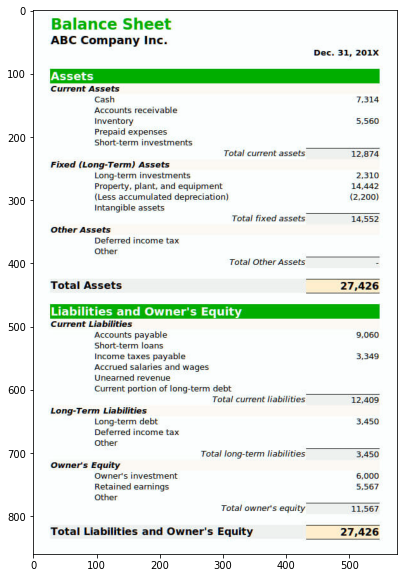

In [ ]:
plt.figure(figsize=(20, 10))
plt.imshow(image)

## ii. After

In [ ]:
for l in layout:
    if l.type == 'Table':
        x_1 = int(l.block.x_1)
        y_1 = int(l.block.y_1)
        x_2 = int(l.block.x_2)
        y_2 = int(l.block.y_2)
    
        break

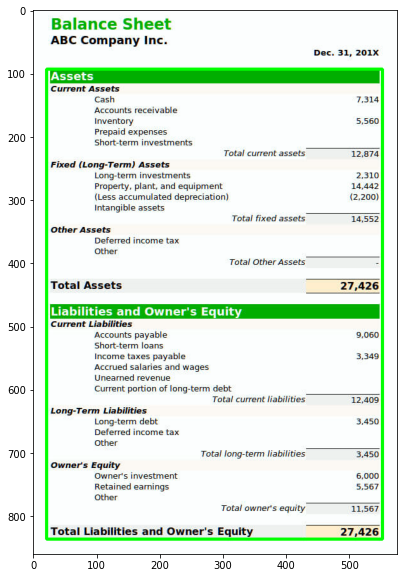

In [ ]:
top_left = (x_1, y_1)
bottom_right = (x_2,y_2)
# Drawing the rectangle using top_left and bottom_right coordinates and giving a descent color((0,255,0)) and thickness(3).
img = cv2.rectangle(image,top_left,bottom_right,(0,255,0),3)

# Showing the image
plt.figure(figsize=(20,10))
plt.imshow(img)

In [ ]:
cv2.imwrite('ext_im.jpg', image[y_1:y_2,x_1:x_2])

True

# IV. Text Detection and Recognition

In [ ]:
ocr = PaddleOCR(lang='en')
image_path = '/content/ext_im.jpg'
image_cv = cv2.imread(image_path)
image_height = image_cv.shape[0]
image_width = image_cv.shape[1]

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 3.86M/3.86M [00:03<00:00, 1.18MiB/s]


download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv3_rec_infer/en_PP-OCRv3_rec_infer.tar


100%|██████████| 9.96M/9.96M [00:05<00:00, 1.90MiB/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:02<00:00, 749kiB/s] 

[2022/08/31 23:31:54] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_fce_box_type='poly', det_limit_side_len=960, det_limit_type='max', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_box_type='quad', det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='f

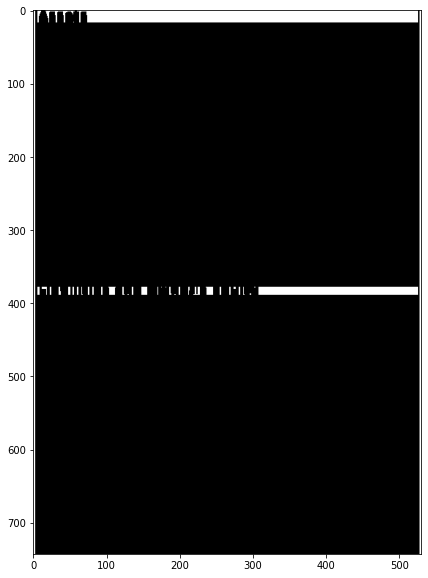

In [ ]:
img_vert = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image_cv = cv2.imread(image_path)
#thresholding the image to a binary image

thresh,img_bin = cv2.threshold(img_vert,128,255,cv2.THRESH_BINARY |cv2.THRESH_OTSU)
#inverting the image 
img_bin = 255-img_bin

# Length(width) of kernel as 100th of total width
kernel_len = np.array(img_vert).shape[1]//100
# Defining a vertical kernel to detect all vertical lines of image 
ver_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_len))

# A kernel of 2x2
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))

#Use vertical kernel to detect and save the vertical lines in a jpg
image_1 = cv2.erode(img_bin, ver_kernel, iterations=3)
vertical = cv2.dilate(image_1, ver_kernel, iterations=3)

#Plot the generated image
plt.figure(figsize=(20, 10))
plotting = plt.imshow(image_1,cmap='gray')
plt.show()


# # Load image, convert to grayscale, Otsu's threshold
# gray = cv2.cvtColor(im_vert, cv2.COLOR_BGR2GRAY)
# thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# # Find number of columns
# vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,25))
# vertical = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=3)
cnts = cv2.findContours(vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

steps = []
for c in cnts:
  steps.append(c[0][0][0])

steps.reverse()

vert_lines = 0
for c in steps:
  image_cv = np.insert(image_cv, c, np.zeros([30,image_height,3], dtype=np.uint8) + 255, axis=1) 
  vert_lines += 1

In [ ]:
image_height = image_cv.shape[0]
image_width = image_cv.shape[1]
cv2.imwrite('detections.jpg', image_cv)
output = ocr.ocr('/content/detections.jpg')

[2022/08/31 23:31:55] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2022/08/31 23:31:55] ppocr DEBUG: dt_boxes num : 56, elapse : 0.06558084487915039
[2022/08/31 23:31:55] ppocr DEBUG: rec_res num  : 56, elapse : 0.1532139778137207


In [ ]:
print(output)

[[[[1113.0, 4.0], [1186.0, 4.0], [1186.0, 23.0], [1113.0, 23.0]], ('Assets', 0.994266927242279)], [[[1113.0, 23.0], [1228.0, 23.0], [1228.0, 41.0], [1113.0, 41.0]], ('Current Assets', 0.9864456057548523)], [[[1185.0, 41.0], [1223.0, 41.0], [1223.0, 55.0], [1185.0, 55.0]], ('Cash', 0.9965057373046875)], [[[1627.0, 38.0], [1668.0, 38.0], [1668.0, 59.0], [1627.0, 59.0]], ('7,314', 0.9776679873466492)], [[[1183.0, 53.0], [1320.0, 55.0], [1320.0, 75.0], [1183.0, 73.0]], ('Accounts receivable', 0.9737541675567627)], [[[1184.0, 71.0], [1251.0, 75.0], [1250.0, 95.0], [1183.0, 91.0]], ('Inventory', 0.9821435213088989)], [[[1625.0, 73.0], [1668.0, 73.0], [1668.0, 93.0], [1625.0, 93.0]], ('5,560', 0.9757097959518433)], [[[1183.0, 91.0], [1305.0, 91.0], [1305.0, 109.0], [1183.0, 109.0]], ('Prepaid expenses', 0.9726924896240234)], [[[1186.0, 111.0], [1339.0, 111.0], [1339.0, 123.0], [1186.0, 123.0]], ('Short-term investments', 0.9707311987876892)], [[[1385.0, 121.0], [1521.0, 125.0], [1520.0, 145.0

## i. Before

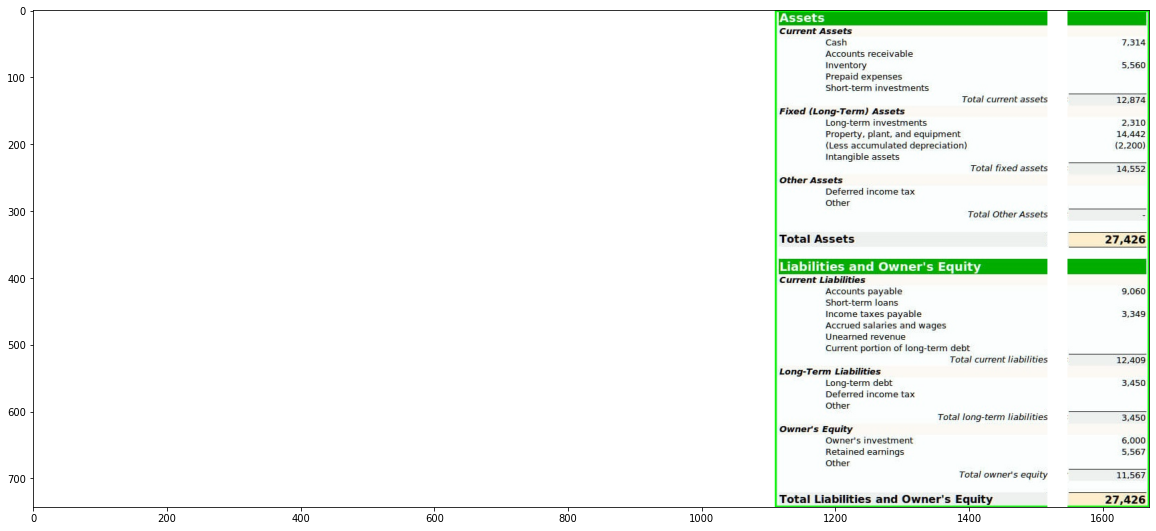

In [ ]:
plt.figure(figsize=(20, 10))
plt.imshow(image_cv)

## ii. After

In [ ]:
boxes = [line[0] for line in output]
texts = [line[1][0] for line in output]
probabilities = [line[1][1] for line in output]

In [ ]:
image_boxes = image_cv.copy()

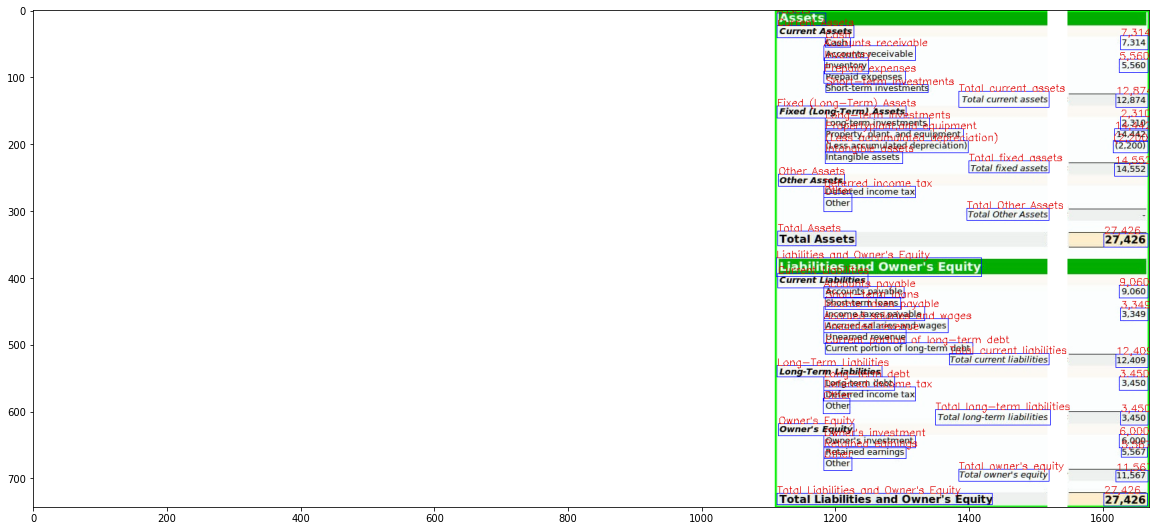

In [ ]:
for box,text in zip(boxes,texts):
  cv2.rectangle(image_boxes, (int(box[0][0]),int(box[0][1])), (int(box[2][0]),int(box[2][1])),(0,0,255),1)
  cv2.putText(image_boxes, text,(int(box[0][0]),int(box[0][1])),cv2.FONT_HERSHEY_SIMPLEX,0.5,(222,0,0),1)

# Showing the image
plt.figure(figsize=(20,10))
plt.imshow(image_boxes)

In [ ]:
cv2.imwrite('detections.jpg', image_boxes)

True

# V. Reconstruction

## i. Get Horizontal and Vertical Lines

In [ ]:
im = image_cv.copy()

In [ ]:
boxes

[[[1113.0, 4.0], [1186.0, 4.0], [1186.0, 23.0], [1113.0, 23.0]],
 [[1113.0, 23.0], [1228.0, 23.0], [1228.0, 41.0], [1113.0, 41.0]],
 [[1185.0, 41.0], [1223.0, 41.0], [1223.0, 55.0], [1185.0, 55.0]],
 [[1627.0, 38.0], [1668.0, 38.0], [1668.0, 59.0], [1627.0, 59.0]],
 [[1183.0, 53.0], [1320.0, 55.0], [1320.0, 75.0], [1183.0, 73.0]],
 [[1184.0, 71.0], [1251.0, 75.0], [1250.0, 95.0], [1183.0, 91.0]],
 [[1625.0, 73.0], [1668.0, 73.0], [1668.0, 93.0], [1625.0, 93.0]],
 [[1183.0, 91.0], [1305.0, 91.0], [1305.0, 109.0], [1183.0, 109.0]],
 [[1186.0, 111.0], [1339.0, 111.0], [1339.0, 123.0], [1186.0, 123.0]],
 [[1385.0, 121.0], [1521.0, 125.0], [1520.0, 145.0], [1385.0, 141.0]],
 [[1620.0, 125.0], [1668.0, 125.0], [1668.0, 145.0], [1620.0, 145.0]],
 [[1113.0, 143.0], [1306.0, 143.0], [1306.0, 161.0], [1113.0, 161.0]],
 [[1185.0, 161.0], [1341.0, 161.0], [1341.0, 179.0], [1185.0, 179.0]],
 [[1627.0, 159.0], [1668.0, 159.0], [1668.0, 179.0], [1627.0, 179.0]],
 [[1185.0, 177.0], [1392.0, 177.0], [1

In [ ]:
horiz_boxes = []
vert_boxes = []

for box in boxes:
  x_h, x_v = 0,int(box[0][0])
  y_h, y_v = int(box[0][1]),0
  width_h,width_v = image_width, int(box[2][0]-box[0][0])
  height_h,height_v = int(box[2][1]-box[0][1]),image_height

  horiz_boxes.append([x_h,y_h,x_h+width_h,y_h+height_h])
  vert_boxes.append([x_v,y_v,x_v+width_v,y_v+height_v])

  cv2.rectangle(im,(x_h,y_h), (x_h+width_h,y_h+height_h),(0,0,255),1)
  cv2.rectangle(im,(x_v,y_v), (x_v+width_v,y_v+height_v),(0,255,0),1)
  

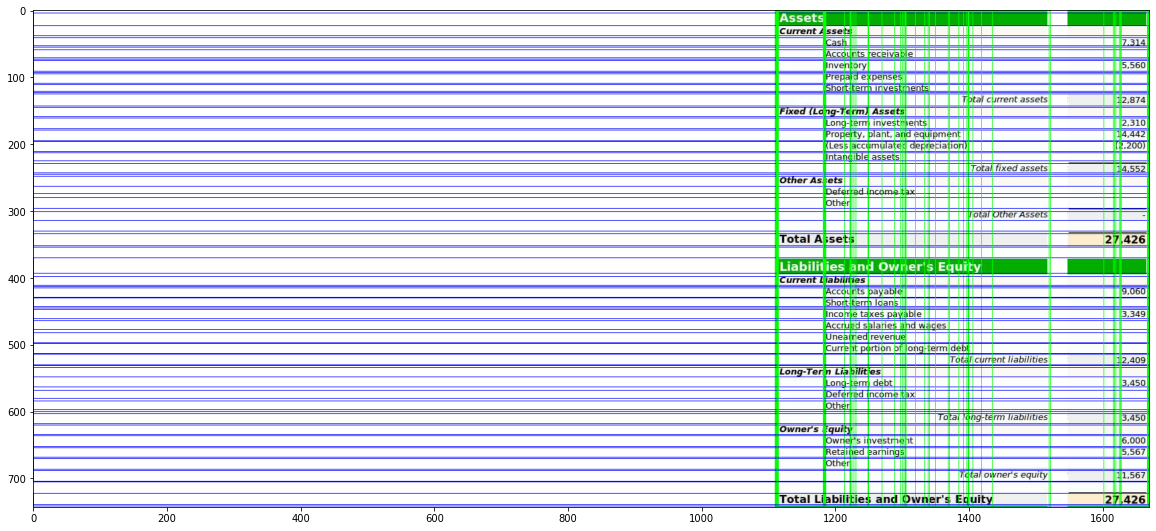

In [ ]:
# Showing the image
plt.figure(figsize=(20,10))
plt.imshow(im)

In [ ]:
cv2.imwrite('horiz_vert.jpg',im)

True

## ii. Non-Max Suppression

In [ ]:
horiz_out = tf.image.non_max_suppression(
    horiz_boxes,
    probabilities,
    max_output_size = 1000,
    iou_threshold=0.1,
    score_threshold=float('-inf'),
    name=None
)

In [ ]:
horiz_lines = np.sort(np.array(horiz_out))
print(horiz_lines)

[ 0  1  2  4  5  8 10 11 12 14 16 18 20 21 23 25 28 29 31 33 35 36 38 39
 40 43 45 46 47 50 51 53 55]


In [ ]:
im_nms = image_cv.copy()

In [ ]:
for val in horiz_lines:
  cv2.rectangle(im_nms, (int(horiz_boxes[val][0]),int(horiz_boxes[val][1])), (int(horiz_boxes[val][2]),int(horiz_boxes[val][3])),(0,0,255),1)
  

In [ ]:
cv2.imwrite('im_nms.jpg',im_nms)

True

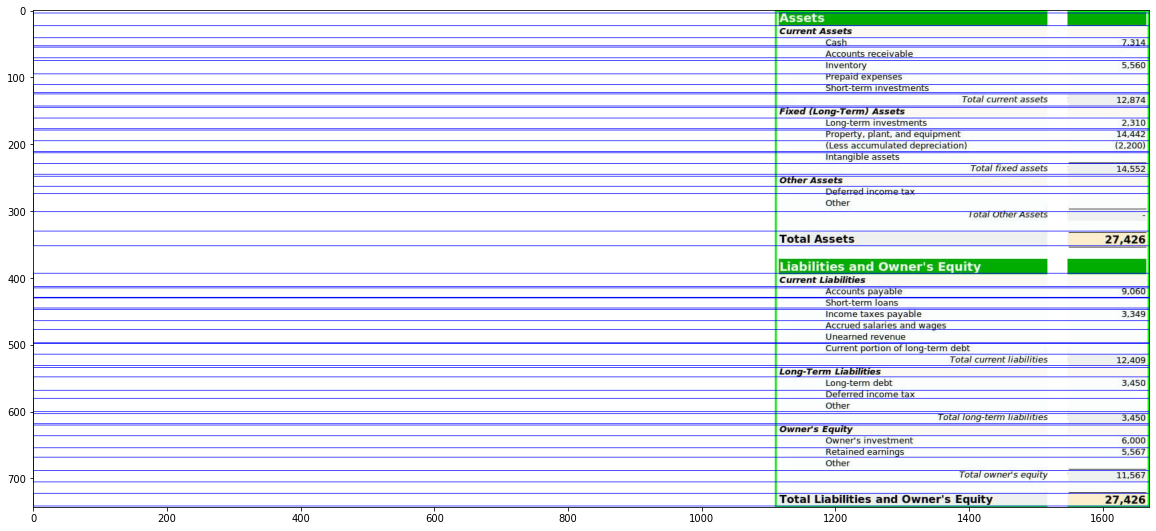

In [ ]:
# Showing the image
plt.figure(figsize=(20,10))
plt.imshow(im_nms)

In [ ]:
vert_out = tf.image.non_max_suppression(
    vert_boxes,
    probabilities,
    max_output_size = 1000,
    iou_threshold=0.05,
    score_threshold=float('-inf'),
    name=None,
)

In [ ]:
vert_lines = np.sort(np.array(vert_out))
print(vert_lines)

[ 0 10 40 44]


In [ ]:
im_nms = image_cv.copy()

In [ ]:
# Deleting empty boxes
tmp = vert_lines.copy()
for i in vert_lines:
  if (abs(vert_boxes[i][2] - vert_boxes[i][0]) < 10) or (abs(vert_boxes[i][1] - vert_boxes[i][3]) < 10) :
    print(i)
    tmp.remove(i)
vert_lines = tmp

In [ ]:
for val in vert_lines:
  cv2.rectangle(im_nms, (int(vert_boxes[val][0]),int(vert_boxes[val][1])), (int(vert_boxes[val][2]),int(vert_boxes[val][3])),(255,0,0),1)
  

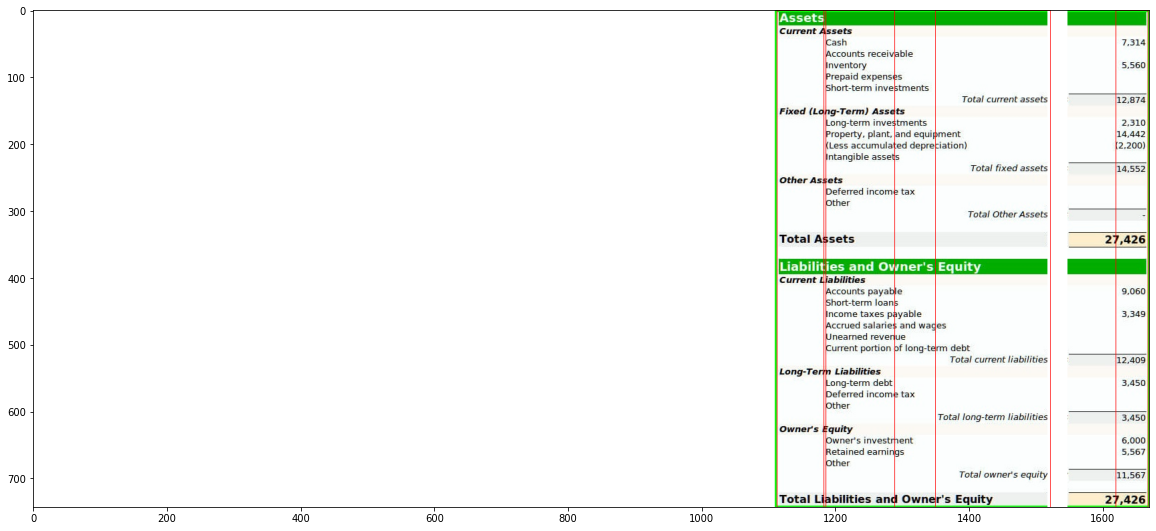

In [ ]:
# Showing the image
plt.figure(figsize=(20,10))
plt.imshow(im_nms)

In [ ]:
# cv2.imwrite('im_nms.jpg',im_nms)

# IV. Conversion

## i. Convert to CSV

In [ ]:
out_array = [["" for i in range(len(vert_lines))] for j in range(len(horiz_lines))]
print(np.array(out_array).shape)
print(out_array)

(33, 4)
[['', '', '', ''], ['', '', '', ''], ['', '', '', ''], ['', '', '', ''], ['', '', '', ''], ['', '', '', ''], ['', '', '', ''], ['', '', '', ''], ['', '', '', ''], ['', '', '', ''], ['', '', '', ''], ['', '', '', ''], ['', '', '', ''], ['', '', '', ''], ['', '', '', ''], ['', '', '', ''], ['', '', '', ''], ['', '', '', ''], ['', '', '', ''], ['', '', '', ''], ['', '', '', ''], ['', '', '', ''], ['', '', '', ''], ['', '', '', ''], ['', '', '', ''], ['', '', '', ''], ['', '', '', ''], ['', '', '', ''], ['', '', '', ''], ['', '', '', ''], ['', '', '', ''], ['', '', '', ''], ['', '', '', '']]


In [ ]:
unordered_boxes = []

for i in vert_lines:
  print(vert_boxes[i])
  unordered_boxes.append(vert_boxes[i][0])

[1113, 0, 1186, 743]
[1620, 0, 1668, 743]
[1183, 0, 1289, 743]
[1350, 0, 1522, 743]


In [ ]:
ordered_boxes = np.argsort(unordered_boxes)
print(ordered_boxes)

[0 2 3 1]


In [ ]:
def intersection(box_1, box_2):
  return [box_2[0], box_1[1],box_2[2], box_1[3]]

In [ ]:
def iou(box_1, box_2):

  x_1 = max(box_1[0], box_2[0])
  y_1 = max(box_1[1], box_2[1])
  x_2 = min(box_1[2], box_2[2])
  y_2 = min(box_1[3], box_2[3])

  inter = abs(max((x_2 - x_1, 0)) * max((y_2 - y_1), 0))
  if inter == 0:
      return 0
      
  box_1_area = abs((box_1[2] - box_1[0]) * (box_1[3] - box_1[1]))
  box_2_area = abs((box_2[2] - box_2[0]) * (box_2[3] - box_2[1]))
  
  return inter / float(box_1_area + box_2_area - inter)

In [ ]:
for i in range(len(horiz_lines)):
  for j in range(len(vert_lines)):
    resultant = intersection(horiz_boxes[horiz_lines[i]], vert_boxes[vert_lines[ordered_boxes[j]]] )

    for b in range(len(boxes)):
      the_box = [boxes[b][0][0],boxes[b][0][1],boxes[b][2][0],boxes[b][2][1]]
      if(iou(resultant,the_box)>0.1) and (texts[b] != out_array[i][j-1]):
        out_array[i][j] = texts[b]

In [ ]:
out_array

[['Assets', '', '', ''],
 ['Current Assets', '', '', ''],
 ['', 'Cash', '', '7,314'],
 ['', 'Accounts receivable', '', '7,314'],
 ['', 'Inventory', '', '5,560'],
 ['', 'Short-term investments', '', ''],
 ['', '', 'Total current assets', '12,874'],
 ['Fixed (Long-Term) Assets', '', '', ''],
 ['', 'Long-term investments', '', '2,310'],
 ['', 'Propertyplant,and equipment', '', '14,442'],
 ['', '(Less accumulated depreciation)', '', '(2,200)'],
 ['', 'Intangible assets', 'Total fixed assets', ''],
 ['', '', 'Total fixed assets', '14,552'],
 ['Other Assets', '', '', ''],
 ['', 'Other', '', ''],
 ['Total Assets', '', '', '27,426'],
 ['Current Liabilities', '', '', '9,060'],
 ['', 'Accounts payable', '', '9,060'],
 ['', 'Short-term loans', '', ''],
 ['', 'Income taxes payable', '', '3,349'],
 ['', 'Unearned revenue', '', ''],
 ['', 'Current portion of long-term debt', '', ''],
 ['', '', 'Total current liabilities', '12,409'],
 ['Long-Term Liabilities', '', '', ''],
 ['', 'Deferred income tax'

In [ ]:
out_array = np.array(out_array)

In [ ]:
pd.DataFrame(out_array).to_csv('sample.csv')

## ii. Convert to JSON format

In [ ]:
import csv 
import json 

def csv_to_json(csvFilePath, jsonFilePath):
    jsonArray = []
      
    #read csv file
    with open(csvFilePath, encoding='utf-8') as csvf: 
        #load csv file data using csv library's dictionary reader
        csvReader = csv.DictReader(csvf) 

        #convert each csv row into python dict
        for row in csvReader: 
            #add this python dict to json array
            jsonArray.append(row)
  
    #convert python jsonArray to JSON String and write to file
    with open(jsonFilePath, 'w', encoding='utf-8') as jsonf: 
        jsonString = json.dumps(jsonArray, indent=4)
        jsonf.write(jsonString)
          
csvFilePath = r'sample.csv'
jsonFilePath = r'data.json'
csv_to_json(csvFilePath, jsonFilePath)

In [ ]:
fileObject = open("data.json", "r")
jsonContent = fileObject.read()
aList = json.loads(jsonContent)
print(aList)

[{'': '0', '0': 'Assets', '1': '', '2': '', '3': ''}, {'': '1', '0': 'Current Assets', '1': '', '2': '', '3': ''}, {'': '2', '0': '', '1': 'Cash', '2': '', '3': '7,314'}, {'': '3', '0': '', '1': 'Accounts receivable', '2': '', '3': '7,314'}, {'': '4', '0': '', '1': 'Inventory', '2': '', '3': '5,560'}, {'': '5', '0': '', '1': 'Short-term investments', '2': '', '3': ''}, {'': '6', '0': '', '1': '', '2': 'Total current assets', '3': '12,874'}, {'': '7', '0': 'Fixed (Long-Term) Assets', '1': '', '2': '', '3': ''}, {'': '8', '0': '', '1': 'Long-term investments', '2': '', '3': '2,310'}, {'': '9', '0': '', '1': 'Propertyplant,and equipment', '2': '', '3': '14,442'}, {'': '10', '0': '', '1': '(Less accumulated depreciation)', '2': '', '3': '(2,200)'}, {'': '11', '0': '', '1': 'Intangible assets', '2': 'Total fixed assets', '3': ''}, {'': '12', '0': '', '1': '', '2': 'Total fixed assets', '3': '14,552'}, {'': '13', '0': 'Other Assets', '1': '', '2': '', '3': ''}, {'': '14', '0': '', '1': 'Othe